# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/cardekho_dataset.csv")

# Data Encoding

In [3]:
df['seller_type']=df['seller_type'].replace({'Dealer':0,'Individual':1,'Trustmark Dealer':3})

<ipython-input-3-7711c354c424>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['seller_type']=df['seller_type'].replace({'Dealer':0,'Individual':1,'Trustmark Dealer':3})


In [4]:
df[['seller_type','selling_price']].corr()

,seller_type,selling_price
seller_type,1.000000,-0.130843
selling_price,-0.130843,1.000000


In [5]:
df['transmission_type']=df['transmission_type'].replace({'Manual':0,'Automatic':1})

<ipython-input-5-c9dfb97546c7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transmission_type']=df['transmission_type'].replace({'Manual':0,'Automatic':1})


In [6]:
df['fuel_type']=df['fuel_type'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})

<ipython-input-6-fc8e995694e3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fuel_type']=df['fuel_type'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})


In [7]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,1,0,0,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,1,0,0,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,1,0,0,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,1,0,0,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,0,1,0,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,0,0,0,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,0,0,0,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,0,1,0,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,0,1,0,16.00,2179,140.00,7,1225000


In [8]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

<Axes: >

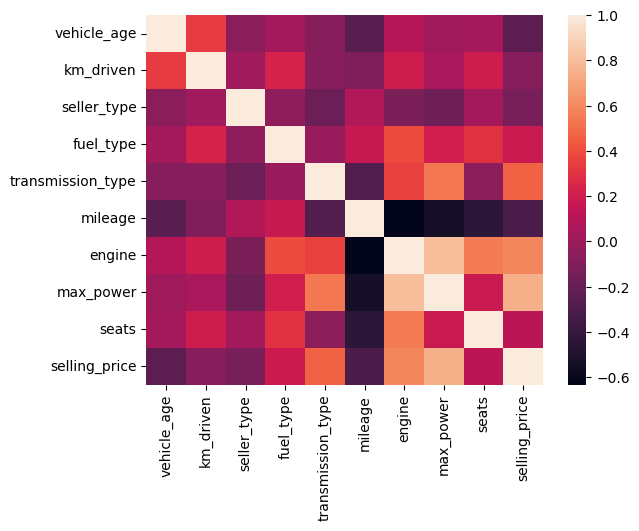

In [9]:
import seaborn as sns
sns.heatmap(df[['vehicle_age', 'km_driven','seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine','max_power', 'seats','selling_price']].corr())

# Feature Engineering

In [10]:
df['power_per_cc']=df['engine']/df['max_power']
df.drop(['engine','max_power'],axis=1,inplace=True)

In [11]:
df['age_per_km']=df['vehicle_age']/df['km_driven']
df.drop(['vehicle_age','km_driven'],axis=1,inplace=True)

In [12]:
df

,Unnamed: 0,car_name,brand,model,seller_type,fuel_type,transmission_type,mileage,seats,selling_price,power_per_cc,age_per_km
0,0,Maruti Alto,Maruti,Alto,1,0,0,19.70,5,120000,17.192225,0.000075
1,1,Hyundai Grand,Hyundai,Grand,1,0,0,18.90,5,550000,14.597561,0.000250
2,2,Hyundai i20,Hyundai,i20,1,0,0,17.00,5,215000,14.962500,0.000183
3,3,Maruti Alto,Maruti,Alto,1,0,0,20.92,5,226000,14.873323,0.000243
4,4,Ford Ecosport,Ford,Ecosport,0,1,0,22.77,5,570000,15.194239,0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,0,0,0,19.81,5,250000,15.958854,0.000839
15407,19540,Maruti Ertiga,Maruti,Ertiga,0,0,0,17.50,7,925000,15.071350,0.000111
15408,19541,Skoda Rapid,Skoda,Rapid,0,1,0,21.14,5,425000,14.470634,0.000090
15409,19542,Mahindra XUV500,Mahindra,XUV500,0,1,0,16.00,7,1225000,15.564286,0.000001


# Target Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(df[['selling_price']])

In [24]:
X=df[[ 'seller_type', 'fuel_type','transmission_type', 'mileage', 'seats', 'selling_price','power_per_cc', 'age_per_km']]

In [27]:
y=y_scaled

# Train Test Split (80:20)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

# ML Models

In [35]:
# Importing Models
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold, cross_val_score
# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Support Vector Regressor', SVR()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))
models.append(('Lasso Regressiom', Lasso()))
models.append(('ElasticNet Regression', ElasticNet()))

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()

    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)

    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)

    train_l.append(train)


    test_l.append(test)




    # predict values
    predictions = clf.predict(X_test)


    # y_test = scaler_y.inverse_transform(y_test)
    # predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1))

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse = scaler_y.inverse_transform(rmse.reshape(-1, 1))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae = scaler_y.inverse_transform(np.array(mae).reshape(-1, 1))
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)

    # evaluate model
    scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    # y_pred_inv = scaler_y.inverse_transform(y_test)
    # y_true_inv = scaler_y.inverse_transform(predictions.reshape(-1, 1))

    mse=mean_squared_error(y_test, predictions)
    mse=scaler_y.inverse_transform(np.array(mse).reshape(-1, 1))


    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print("Mean Squired Error (MSE):", mse)
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)



    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

comp = pd.DataFrame({"Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l, "R2 Score": r2_l})
comp

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.73313e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Mean absolute error (MAE) :  [[40000.]]
--------------------------------------------------
Mean Squired Error (MSE): [[40000.]]
+ ==================================================================================================== +
Root mean squared error (RMSE) :  [[40000.]]
--------------------------------------------------
R2 score :  1.0
--------------------------------------------------
cross validation accuracy :  1.0
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (Ridge) : 0.129 seconds...
							-----------------------------------------------------------

+ ============================================================================

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Mean absolute error (MAE) :  [[41262.9240999]]
--------------------------------------------------
Mean Squired Error (MSE): [[40016.19919946]]
+ ==================================================================================================== +
Root mean squared error (RMSE) :  [[65282.80859759]]
--------------------------------------------------
R2 score :  0.9990349576539723
--------------------------------------------------
cross validation accuracy :  0.956808424320941
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (Random Forest) : 20.061 seconds...
							-----------------------------------------------------------

+ =======

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


+ ==================================================================================================== +
			6-For Support Vector Regressor The Performance result is: 
+ ==================================================================================================== +
Mean absolute error (MAE) :  [[3518429.44557328]]
--------------------------------------------------
Mean Squired Error (MSE): [[347742.05627512]]
+ ==================================================================================================== +
Root mean squared error (RMSE) :  [[3524752.72302299]]
--------------------------------------------------
R2 score :  -17.333258797342634
--------------------------------------------------
cross validation accuracy :  -15.398137160510288
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (Support Vector Regressor) : 0.502 seconds...
							----------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


+ ==================================================================================================== +
			7-For GradientBoostingRegressor The Performance result is: 
+ ==================================================================================================== +
Mean absolute error (MAE) :  [[45155.4430505]]
--------------------------------------------------
Mean Squired Error (MSE): [[40010.37002881]]
+ ==================================================================================================== +
Root mean squared error (RMSE) :  [[60228.72553963]]
--------------------------------------------------
R2 score :  0.9993822215128336
--------------------------------------------------
cross validation accuracy :  0.9766958924857733
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (GradientBoostingRegressor) : 8.156 seconds...
							----------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


+ ==================================================================================================== +
			8-For AdaBoostRegressor The Performance result is: 
+ ==================================================================================================== +
Mean absolute error (MAE) :  [[231276.39619451]]
--------------------------------------------------
Mean Squired Error (MSE): [[41352.10905971]]
+ ==================================================================================================== +
Root mean squared error (RMSE) :  [[270985.33177732]]
--------------------------------------------------
R2 score :  0.9194501862566676
--------------------------------------------------
cross validation accuracy :  0.8872582562827673
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (AdaBoostRegressor) : 3.323 seconds...
							-----------------------------------------------------------

,Training Score,Testing Score,MAE,RMSE,R2 Score
0,1.000000,1.000000,[[40000.00000000039]],[[40000.000000000626]],1.000000
1,1.000000,1.000000,[[40000.000000000284]],[[40000.0000000004]],1.000000
2,0.954783,0.999060,[[41116.61530976322]],[[64957.96034342008]],0.999060
3,0.991488,0.999035,[[41262.92409990327]],[[65282.80859758717]],0.999035
4,1.000000,0.999433,[[40949.11612066206]],[[59385.62116672524]],0.999433
5,-13.619823,-17.333259,[[3518429.445573283]],[[3524752.7230229937]],-17.333259
6,0.999917,0.999382,[[45155.44305050441]],[[60228.725539630446]],0.999382
7,0.936502,0.919450,[[231276.39619451168]],[[270985.3317773161]],0.919450
8,1.000000,1.000000,[[40021.202254303054]],[[40038.53514309342]],1.000000
9,1.000000,1.000000,[[40010.60112742012]],[[40019.26757203484]],1.000000


# MLP

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and prepare data
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1).values
# y = df['target'].values.reshape(-1, 1)

# # Split and scale data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# DataLoader
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)


model = MLP(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(20):
    model.train()
    for xb, yb in train_loader:
        preds = model(xb)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/50, Loss: {loss.item():.10f}")

# Evaluation
model.eval()
with torch.no_grad():
    test_preds = model(X_test_tensor)
    y_pred = test_preds.numpy()
    y_true = y_test_tensor.numpy()





rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmse = scaler_y.inverse_transform(rmse.reshape(-1, 1))
rmse_l.append(rmse)
# MAE
mae = mean_absolute_error(y_true, y_pred)
mae = scaler_y.inverse_transform(np.array(mae).reshape(-1, 1))
mae_l.append(mae)
# R2 score
r2 = r2_score(y_true, y_pred)
r2_l.append(r2)

mse=mean_squared_error(y_true, y_pred)
mse=scaler_y.inverse_transform(np.array(mse).reshape(-1, 1))


print('Mean absolute error (MAE) : ', mae)
print("-"*50)
print("Mean Squired Error (MSE):", mse)
print("+","="*100,"+")
print('Root mean squared error (RMSE) : ', rmse)
print("-"*50)
print('R2 score : ', r2)






Epoch 10/50, Loss: 0.0000663331
Epoch 20/50, Loss: 0.0001427357
Mean absolute error (MAE) :  [[158221.05732746]]
--------------------------------------------------
Mean Squired Error (MSE): [[40878.34454273]]
+ ==================================================================================================== +
Root mean squared error (RMSE) :  [[226170.55528718]]
--------------------------------------------------
R2 score :  0.9476739764213562
